In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

In [5]:
df = pd.read_csv('../heart.csv')

In [6]:
df.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


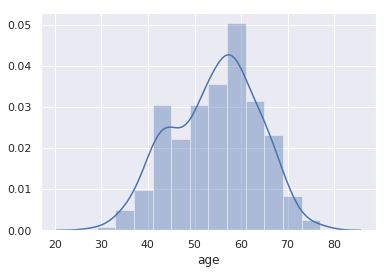

In [7]:
x=df['age']
sns.distplot(x)

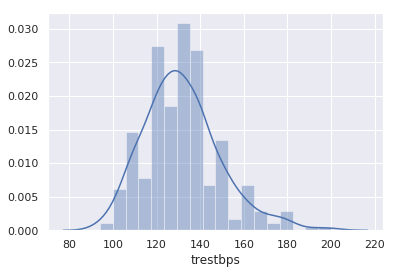

In [8]:
y=df['trestbps']
sns.distplot(y)



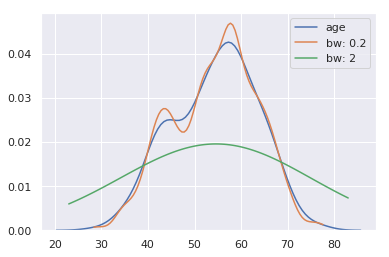

In [9]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

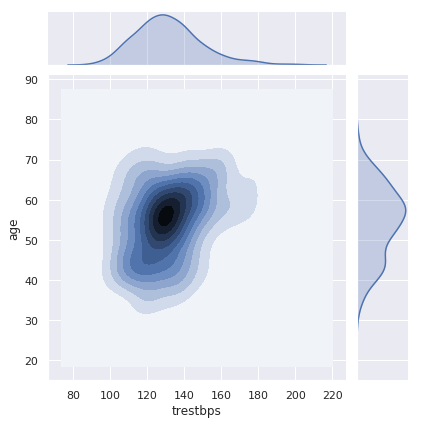

In [10]:
sns.jointplot(x="trestbps", y="age",kind="kde", data=df);

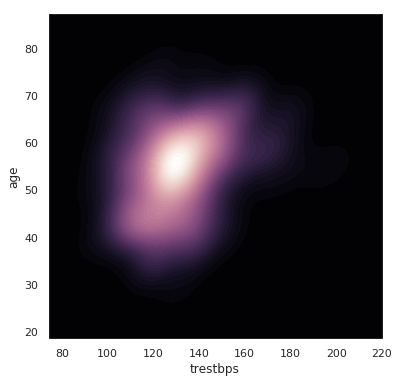

In [11]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.trestbps, df.age, cmap=cmap, n_levels=60, shade=True);

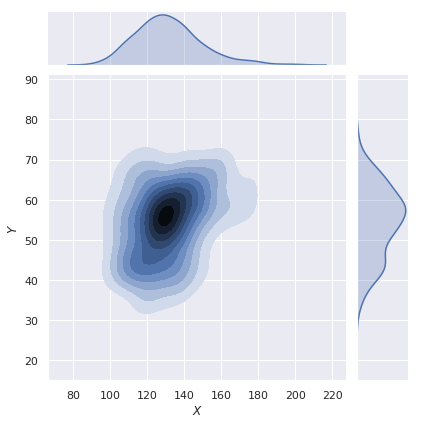

In [12]:
g = sns.jointplot(x="trestbps", y="age", data=df, kind="kde")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

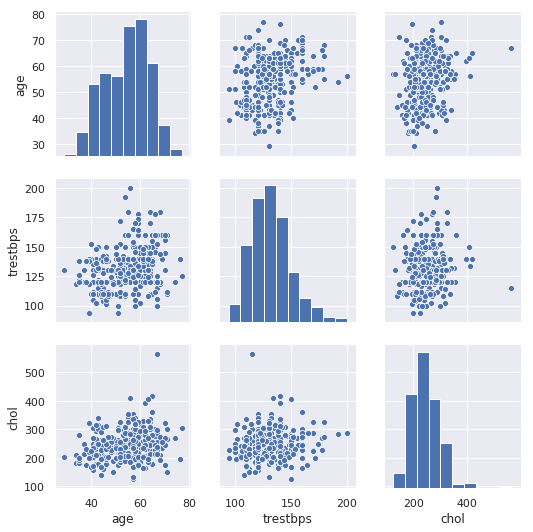

In [13]:
df1 = df[['age','trestbps','chol']]
sns.pairplot(df1);


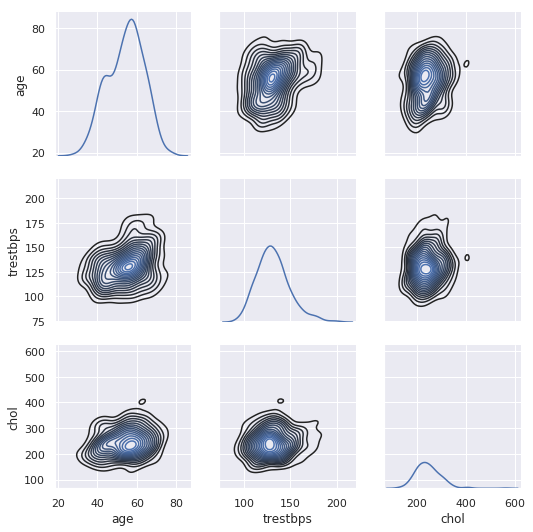

In [14]:
g = sns.PairGrid(df1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=20);

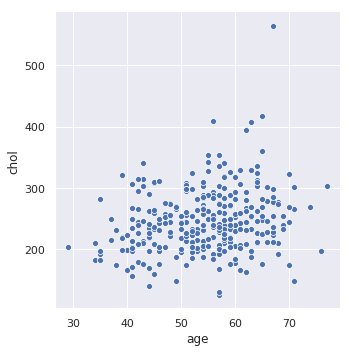

In [15]:
sns.relplot(x="age", y="chol", data=df);

In [1]:
sns.relplot(x="age", y="chol", hue="sex", data=df);

NameError: name 'sns' is not defined

In [2]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

NameError: name 'sns' is not defined

In [3]:
fig, ax=plt.subplots( figsize=(6,6))
sns.regplot(x="age", y="chol", data=df,)

NameError: name 'plt' is not defined

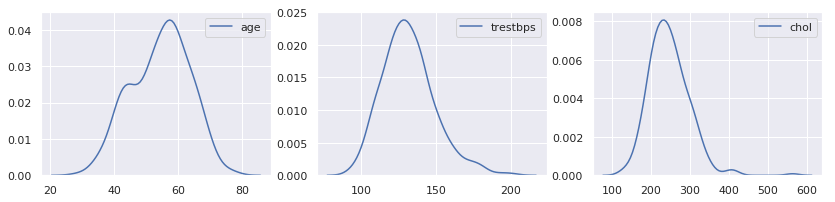

In [71]:
fig, ax=plt.subplots(1,3, figsize=(14,3))
sns.kdeplot(df['age'], ax=ax[0])
sns.kdeplot(df['trestbps'], ax=ax[1])
sns.kdeplot(df['chol'], ax=ax[2])

In [75]:
x=df.drop(['cp'] , axis=1)
y=df['cp']

In [77]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)


thalach     0.164941
chol        0.132920
age         0.127697
trestbps    0.120573
oldpeak     0.107153
target      0.083770
exang       0.062611
ca          0.050031
thal        0.039333
slope       0.035663
restecg     0.030148
sex         0.025637
fbs         0.019524
dtype: float64

In [78]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [79]:
Xtrain,Xtest, Ytrain, Ytest=train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

In [80]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(Xtrain,Ytrain)
    prediction=model.predict(Xtest)
    abc.append(metrics.accuracy_score(prediction,Ytest))

models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,0
Linear Svm,0.606557
Radial Svm,0.475410
Logistic Regression,0.557377
KNN,0.459016
Decision Tree,0.409836
